Comp9727 Assignment
Name: Ao Qu
Student number: z5582247

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, balanced_accuracy_score, precision_score, recall_score
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

### Part 1. Topic Classiﬁcation

#### Q1

(1) Refine the common use of regular expressions, remove only unnecessary characters, and retain useful special characters.

(2) Use cross-validation methods, such as K-fold cross-validation, to train and test the model on multiple subsets.


#### Q2

In [ ]:
data = pd.read_csv('dataset.tsv', sep='\t')

In [ ]:
data

,artist_name,track_name,release_date,genre,lyrics,topic
0,loving,the not real lake,2016,rock,awake know go see time clear world mirror worl...,dark
1,incubus,into the summer,2019,rock,shouldn summer pretty build spill ready overfl...,lifestyle
2,reignwolf,hardcore,2016,blues,lose deep catch breath think say try break wal...,sadness
3,tedeschi trucks band,anyhow,2016,blues,run bitter taste take rest feel anchor soul pl...,sadness
4,lukas nelson and promise of the real,if i started over,2017,blues,think think different set apart sober mind sym...,dark
...,...,...,...,...,...,...
1495,ra ra riot,absolutely,2016,rock,year absolutely absolutely absolutely crush ab...,emotion
1496,mat kearney,face to face,2018,rock,breakthrough hours hear truth moments trade fa...,dark
1497,owane,born in space,2018,jazz,look look right catch blue eye own state breat...,dark
1498,nappy roots,blowin' trees,2019,hip hop,nappy root gotta alright flyin dear leave lone...,personal


In [ ]:
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags]
    return ' '.join(lemmatized_tokens)

In [ ]:
data['processed_lyrics'] = data['lyrics'].apply(preprocess_text)

In [ ]:
data

,artist_name,track_name,release_date,genre,lyrics,topic,processed_lyrics
0,loving,the not real lake,2016,rock,awake know go see time clear world mirror worl...,dark,awake know go see time clear world mirror worl...
1,incubus,into the summer,2019,rock,shouldn summer pretty build spill ready overfl...,lifestyle,shouldn summer pretty build spill ready overfl...
2,reignwolf,hardcore,2016,blues,lose deep catch breath think say try break wal...,sadness,lose deep catch breath think say try break wal...
3,tedeschi trucks band,anyhow,2016,blues,run bitter taste take rest feel anchor soul pl...,sadness,run bitter taste take rest feel anchor soul pl...
4,lukas nelson and promise of the real,if i started over,2017,blues,think think different set apart sober mind sym...,dark,think think different set apart sober mind sym...
...,...,...,...,...,...,...,...
1495,ra ra riot,absolutely,2016,rock,year absolutely absolutely absolutely crush ab...,emotion,year absolutely absolutely absolutely crush ab...
1496,mat kearney,face to face,2018,rock,breakthrough hours hear truth moments trade fa...,dark,breakthrough hour hear truth moment trade fake...
1497,owane,born in space,2018,jazz,look look right catch blue eye own state breat...,dark,look look right catch blue eye own state breat...
1498,nappy roots,blowin' trees,2019,hip hop,nappy root gotta alright flyin dear leave lone...,personal,nappy root get ta alright flyin dear leave lon...


In [ ]:
# CountVectorizer with the standard settings
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['processed_lyrics'])
y = data['topic']

model = MultinomialNB()

# Perform 5-fold cross-validation to evaluate accuracy
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f'5-fold cross-validation accuracy scores: {scores}')
print(f'Mean accuracy: {scores.mean():.4f}')

5-fold cross-validation accuracy scores: [0.78333333 0.81       0.79       0.73333333 0.78333333]
Mean accuracy: 0.7800


The data processing operations in this section are as follows:

1. Lowercase: Convert all text to lowercase, for example, "Word" and "word" are considered the same word.

2. Remove special characters and punctuation: Clean the text by removing all non-alphabetic characters (such as punctuation, numbers, symbols).

3. Part-of-speech restoration: Restore words to their basic form or dictionary form, for example, "running" is restored to "run".

4. Vectorize using CountVectorizer.

5. Stop word removal: Use the standard English stop word list, and use the stop_words='english' setting in CountVectorizer to remove common stop words.

The overall average accuracy is 78%, which seems to be good, so these steps are also taken in subsequent jobs.



#### Q4

Mean Cross-Validation Scores:
              Metric  BNB Mean  MNB Mean
0           accuracy  0.525333  0.780000
1           f1_macro  0.352625  0.711601
2  balanced_accuracy  0.387542  0.702516
3    precision_macro  0.418382  0.738411
4       recall_macro  0.387542  0.702516


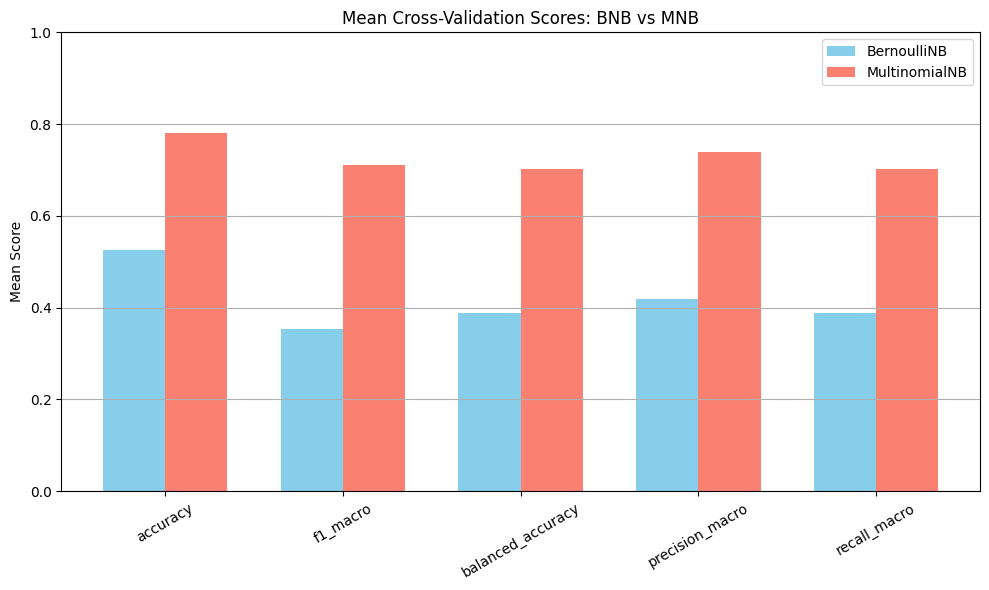

In [ ]:
bnb = BernoulliNB()
mnb = MultinomialNB()

# Metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Cross-validation scores for BNB
bnb_scores = cross_validate(bnb, X, y, cv=5, scoring=scoring)

# Cross-validation scores for MNB
mnb_scores = cross_validate(mnb, X, y, cv=5, scoring=scoring)

# Result
results = pd.DataFrame({
    'Metric': list(scoring.keys()),
    'BNB Mean': [np.mean(bnb_scores[f'test_{metric}']) for metric in scoring],
    'MNB Mean': [np.mean(mnb_scores[f'test_{metric}']) for metric in scoring],
})

print("Mean Cross-Validation Scores:")
print(results)

# Plotting
metrics = results['Metric']
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, results['BNB Mean'], width, label='BernoulliNB', color='skyblue')
ax.bar(x + width/2, results['MNB Mean'], width, label='MultinomialNB', color='salmon')

ax.set_ylabel('Mean Score')
ax.set_title('Mean Cross-Validation Scores: BNB vs MNB')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=30)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
class_distribution = data['topic'].value_counts(normalize=True)
class_distribution

topic
dark         0.326667
sadness      0.250667
personal     0.231333
lifestyle    0.136667
emotion      0.054667
Name: proportion, dtype: float64

F1-macro and balanced accuracy are good indicators of performance across all categories. In addition, accuracy-macro and recall-macro provide insight into the types of errors made by the model. The overall dataset is not balanced, with the difference between the largest and smallest categories being about 6 times.

From the chart, MNB is significantly better than BNB in ​​all metrics, with significantly higher accuracy, F1, balanced accuracy, precision, and recall.

#### Q3

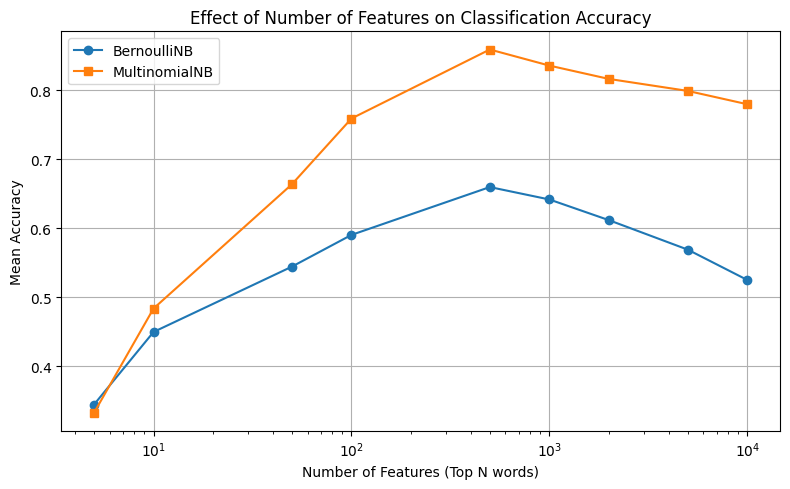

In [ ]:
# Number of features
feature_counts = [5, 10, 50, 100, 500, 1000, 2000, 5000, 10000]

bnb_accuracies = []
mnb_accuracies = []

for n_features in feature_counts:
    vectorizer = CountVectorizer(max_features=n_features, stop_words='english')
    X = vectorizer.fit_transform(data['processed_lyrics'])
    y = data['topic']

    bnb = BernoulliNB()
    mnb = MultinomialNB()

    # 5-fold CV accuracy for BNB
    bnb_scores = cross_val_score(bnb, X, y, cv=5, scoring='accuracy')
    bnb_accuracies.append(np.mean(bnb_scores))

    # 5-fold CV accuracy for MNB
    mnb_scores = cross_val_score(mnb, X, y, cv=5, scoring='accuracy')
    mnb_accuracies.append(np.mean(mnb_scores))

# Plot results
plt.figure(figsize=(8,5))
plt.plot(feature_counts, bnb_accuracies, marker='o', label='BernoulliNB')
plt.plot(feature_counts, mnb_accuracies, marker='s', label='MultinomialNB')
plt.xscale('log')
plt.xlabel('Number of Features (Top N words)')
plt.ylabel('Mean Accuracy')
plt.title('Effect of Number of Features on Classification Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame({
    'Number of Features': feature_counts,
    'BNB Accuracy': bnb_accuracies,
    'MNB Accuracy': mnb_accuracies
})

results_df

,Number of Features,BNB Accuracy,MNB Accuracy
0,5,0.344667,0.332667
1,10,0.450000,0.484000
2,50,0.544667,0.664000
3,100,0.590667,0.759333
4,500,0.660000,0.859333
5,1000,0.642000,0.836000
6,2000,0.612000,0.816667
7,5000,0.569333,0.799333
8,10000,0.525333,0.780000


From the result, we can see that both models reach the highest performance level when N=500.

#### Q5

Support vector machine (SVM) is a classic supervised model. SVM finds a hyperplane that can best classify by maximizing the margin between data points of different categories. It can efficiently handle large feature spaces and usually has good generalization ability. However, the dimension of the dataset in this article is usually large after passing through CountVectorizer. SVM can be well applied to this scenario.

My hypothesis is that the SVM model will be better than BNB and MNB.

In [ ]:
svm = SVC()

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Cross-validation
svm_scores = cross_validate(svm, X, y, cv=5, scoring=scoring)

svm_results = pd.DataFrame({
    'Metric': scoring.keys(),
    'SVM Mean': [np.mean(svm_scores[f'test_{metric}']) for metric in scoring]
})

print(svm_results)

              Metric  SVM Mean
0           accuracy  0.745333
1           f1_macro  0.663995
2  balanced_accuracy  0.627898
3    precision_macro  0.863446
4       recall_macro  0.627898


In [ ]:
results

,Metric,BNB Mean,MNB Mean
0,accuracy,0.525333,0.780000
1,f1_macro,0.352625,0.711601
2,balanced_accuracy,0.387542,0.702516
3,precision_macro,0.418382,0.738411
4,recall_macro,0.387542,0.702516


In [ ]:
vectorizer = CountVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(data['processed_lyrics'])
y = data['topic']
mnb = MultinomialNB()
mnb.fit(X,y)

MultinomialNB()

After adopting the same parameters and data preprocessing scheme, we get the results of SVM. By comparing the results of Step 3, we can find that our assumption is not completely true. The overall performance of SVM is better than that of BNB model, but only in precision_macro it is better than MNB. The other performances are slightly lower than MNB. Therefore, I choose MNB as the best method for topic classification.

### Part2 Recommendation Methods

#### Q1

In [ ]:
user1 = pd.read_csv('user1.tsv', sep='\t')
user2 = pd.read_csv('user2.tsv', sep='\t')

In [ ]:
user1

,topic,keywords
0,dark,"fire, enemy, pain, storm, fight"
1,sadness,"cry, alone, heartbroken, tears, regret"
2,personal,"dream, truth, life, growth, identity"
3,lifestyle,"party, city, night, light, rhythm"
4,emotion,"love, memory, hug, kiss, feel"


In [ ]:
user2

,topic,keywords
0,sadness,"lost, sorrow, goodbye, tears, silence"
1,emotion,"romance, touch, feeling, kiss, memory"


In [ ]:
shuffled_data = shuffle(data, random_state=42).reset_index(drop=True)
train_subset = shuffled_data.iloc[:750]
test_subset = shuffled_data.iloc[750:1000]

# Get text features
train_texts = train_subset['processed_lyrics']
test_texts = test_subset['processed_lyrics']

# TF-IDF
tfidf_vec = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_vec.fit(train_texts)

# Predict
X_train_tfidf = tfidf_vec.transform(train_texts)
train_predicted_topics = mnb.predict(X_train_tfidf)


train_subset = train_subset.assign(predicted_topic=train_predicted_topics)
topic_texts_dict = {
    'dark': train_subset.loc[train_subset['predicted_topic'] == 'dark', 'processed_lyrics'].tolist(),
    'sadness': train_subset.loc[train_subset['predicted_topic'] == 'sadness', 'processed_lyrics'].tolist(),
    'personal': train_subset.loc[train_subset['predicted_topic'] == 'personal', 'processed_lyrics'].tolist(),
    'lifestyle': train_subset.loc[train_subset['predicted_topic'] == 'lifestyle', 'processed_lyrics'].tolist(),
    'emotion': train_subset.loc[train_subset['predicted_topic'] == 'emotion', 'processed_lyrics'].tolist(),
}

In [ ]:
topic_tfidf_matrices = {}
for topic, texts in topic_texts_dict.items():
    topic_tfidf_matrices[topic] = tfidf_vec.transform(texts)

In [ ]:
for t, mtx in topic_tfidf_matrices.items():
    print(f"{t} topic TF-IDF matrix shape: {mtx.shape}")

# Read user keywords
def read_user_keywords(filepath):
    df = pd.read_csv(filepath, sep='\t')
    keywords_map = {}
    for _, row in df.iterrows():
        kw_list = [kw.strip().lower() for kw in row['keywords'].split(',')]
        keywords_map[row['topic']] = kw_list
    return keywords_map

user1_kw = read_user_keywords('user1.tsv')
user2_kw = read_user_keywords('user2.tsv')

# Filter your favorite song texts by keywords
def select_liked_songs(documents, keywords):
    return [doc for doc in documents if any(kw in doc for kw in keywords)]

user1_likes = {}
for topic, docs in topic_texts_dict.items():
    kws = user1_kw.get(topic, [])
    user1_likes[topic] = select_liked_songs(docs, kws)

# Constructing user portrait tf-idf vector
def create_user_profile(liked_docs, vectorizer):
    if len(liked_docs) == 0:
        print("No liked songs found for this topic.")
        return None
    combined = " ".join(liked_docs).replace('\n', ' ')
    return vectorizer.transform([combined])

user1_profiles = {}
for topic, liked_docs in user1_likes.items():
    user1_profiles[topic] = create_user_profile(liked_docs, tfidf_vec)

# Print Top 20 Keywords
def show_top_terms(profile_vec, vectorizer, topic):
    if profile_vec is None:
        print(f"No user profile vector for topic '{topic}'.")
        return
    tfidf_arr = profile_vec.mean(axis=0).A1
    top_indices = tfidf_arr.argsort()[::-1][:20]
    features = np.array(vectorizer.get_feature_names_out())
    top_terms = features[top_indices]
    top_scores = tfidf_arr[top_indices]
    print(f"\nTop 20 terms for topic '{topic}':")
    for term, score in zip(top_terms, top_scores):
        print(f"{term:<15} {score:.4f}")

for topic, vec in user1_profiles.items():
    show_top_terms(vec, tfidf_vec, topic)

dark topic TF-IDF matrix shape: (531, 500)
sadness topic TF-IDF matrix shape: (74, 500)
personal topic TF-IDF matrix shape: (116, 500)
lifestyle topic TF-IDF matrix shape: (21, 500)
emotion topic TF-IDF matrix shape: (8, 500)

Top 20 terms for topic 'dark':
fight           0.2428
come            0.2078
life            0.2003
na              0.1839
live            0.1612
fall            0.1604
like            0.1535
feel            0.1496
pain            0.1441
know            0.1354
gon             0.1312
hold            0.1290
cause           0.1276
yeah            0.1178
ready           0.1151
grind           0.1143
change          0.1139
woah            0.1107
world           0.1099
time            0.1053

Top 20 terms for topic 'sadness':
wish            0.7231
lay             0.4814
hand            0.2827
head            0.1327
regret          0.1121
instead         0.1107
half            0.1094
lock            0.1094
wouldn          0.1038
knee            0.0984
push            0

In [ ]:
user2_likes = {}
for topic, docs in topic_texts_dict.items():
    kws = user2_kw.get(topic, [])
    user2_likes[topic] = select_liked_songs(docs, kws)

user2_profiles = {}
for topic, liked_docs in user2_likes.items():
    user2_profiles[topic] = create_user_profile(liked_docs, tfidf_vec)

for topic, vec in user2_profiles.items():
    show_top_terms(vec, tfidf_vec, topic)

for topic, docs in user2_likes.items():
    print(f"{topic:<15}: {len(docs)} songs")

No liked songs found for this topic.
No liked songs found for this topic.
No liked songs found for this topic.
No user profile vector for topic 'dark'.

Top 20 terms for topic 'sadness':
bless           0.3589
heart           0.3182
follow          0.2629
wish            0.2527
wing            0.2508
count           0.2257
cause           0.1988
open            0.1816
soul            0.1682
write           0.1556
inside          0.1555
remember        0.1546
hell            0.1526
mind            0.1492
oooh            0.1468
feel            0.1429
day             0.1326
babe            0.1308
hard            0.1247
know            0.1133
No user profile vector for topic 'personal'.
No user profile vector for topic 'lifestyle'.

Top 20 terms for topic 'emotion':
absolutely      0.9609
love            0.2231
break           0.0854
year            0.0665
earth           0.0523
stop            0.0508
loud            0.0501
hold            0.0400
free            0.0392
yeah            0.02

USER1: The first 20 terms show a high degree of semantic consistency with their respective categories. The "Dark" theme contains terms such as "fight" and "pain", while "Sadness" contains melancholic terms such as "cry" and "regret" that reflect emotional distress. The "Personal" lyrics are characterized by introspective terms such as "life" and "dream", while "Lifestyle" prominently displays social terms such as "club" and "drink" that create a party atmosphere. The "Emotional" category is particularly represented by relationship-centered terms such as "love" and "heart", which clearly reflect emotional experience, and the term distribution shows significant thematic consistency.

USER2: The Sadness theme contains some negative terms such as blessing, heart, wish, soul, and hell, reflecting desire and inner turmoil. The Emotional category mainly contains "absolute" and "love", as well as expressive terms such as "interruption", "persistence", and "freedom", and the overall rationality expression is not as accurate as USER1.

In [ ]:
# Custom User 3 Keywords
user3_keywords = {
    'dark': ['night', 'shadow', 'fear', 'darkness', 'alone'],
    'sadness': ['cry', 'tears', 'pain', 'broken', 'sorrow'],
    'personal': ['dream', 'life', 'heart', 'feel', 'alone'],
    'lifestyle': ['party', 'dance', 'fun', 'music', 'friends'],
    'emotion': ['love', 'hope', 'feel', 'joy', 'heart']
}

user3_likes = {}
for topic, kws in user3_keywords.items():
    docs = topic_texts_dict.get(topic, [])
    liked_docs = [doc for doc in docs if any(kw in doc for kw in kws)]
    user3_likes[topic] = liked_docs

user3_profiles = {}
for topic, liked_docs in user3_likes.items():
    if len(liked_docs) == 0:
        print(f"User 3 no liked songs found for topic '{topic}'")
        user3_profiles[topic] = None
    else:
        combined_doc = " ".join(liked_docs).replace('\n', ' ')
        user3_profiles[topic] = tfidf_vec.transform([combined_doc])

def print_top_terms(profile_vec, vectorizer, topic):
    if profile_vec is None:
        print(f"No user profile vector for topic '{topic}'.")
        return
    tfidf_arr = profile_vec.mean(axis=0).A1
    top_idx = tfidf_arr.argsort()[::-1][:20]
    features = np.array(vectorizer.get_feature_names_out())
    top_terms = features[top_idx]
    top_scores = tfidf_arr[top_idx]
    print(f"\n=== User 3 Top 20 terms for topic '{topic}' ===")
    for term, score in zip(top_terms, top_scores):
        print(f"{term:<15} {score:.4f}")

for topic, profile_vec in user3_profiles.items():
    print_top_terms(profile_vec, tfidf_vec, topic)


=== User 3 Top 20 terms for topic 'dark' ===
na              0.2175
night           0.1974
heart           0.1874
time            0.1656
come            0.1559
wan             0.1533
like            0.1447
know            0.1401
live            0.1396
tonight         0.1384
life            0.1320
cause           0.1313
break           0.1306
fear            0.1277
yeah            0.1262
gon             0.1137
baby            0.1114
hold            0.1096
fight           0.1081
song            0.1080

=== User 3 Top 20 terms for topic 'sadness' ===
away            0.3564
pain            0.3134
look            0.2417
heart           0.2415
remember        0.1882
bless           0.1873
feel            0.1789
like            0.1709
open            0.1658
cause           0.1630
baby            0.1548
follow          0.1372
dream           0.1363
wish            0.1318
wing            0.1309
heal            0.1223
inside          0.1217
hear            0.1205
count           0.1178
leave   

USER3: USER3 also has good consistency. The "dark" theme includes words such as "night" and "heart". The "sad" category is dominated by words such as "pain" and "remember". The "personal" theme includes "believe" and "life", while the "lifestyle" highlights social elements such as "club" and "drink". The "emotional" category is centered on words such as "absolute" and "love", emphasizing strong emotional connections and experiences. The distribution of these terms shows the connection and consistency between the themes.

#### Q2

In [ ]:
# Recommend songs to users based on their profile.
def recommend_songs(tfidf_vec, topic_tfidf_matrices, topic_texts_dict, user_profile, N=20, M=None, method='cosine'):
    recommendations = []

    for topic, profile_vec in user_profile.items():
        if profile_vec is None:
            continue

        topic_songs = topic_texts_dict[topic]
        topic_matrix = topic_tfidf_matrices[topic]

        if M is not None:
            tfidf_arr = profile_vec.mean(axis=0).A1
            top_indices = tfidf_arr.argsort()[::-1][:M]
            profile_vec = profile_vec[:, top_indices]
            topic_matrix = topic_matrix[:, top_indices]

        # Calculate similarity
        if method == 'cosine':
            similarities = cosine_similarity(profile_vec, topic_matrix).flatten()
        elif method == 'dot':
            similarities = np.dot(profile_vec, topic_matrix.T).toarray().flatten()
        else:
            raise ValueError("Invalid method. Choose 'cosine' or 'dot'.")

        top_indices = np.argsort(similarities)[::-1][:N//5]

        for idx in top_indices:
            recommendations.append({
                'topic': topic,
                'song': topic_songs[idx],
                'score': similarities[idx]
            })

    recommendations.sort(key=lambda x: x['score'], reverse=True)
    return recommendations[:N]


# Evaluate the performance of the recommendation results based on the songs that users actually like.
def evaluate_recommendations(recommendations, user_likes, topics=None):
    if topics is None:
        topics = user_likes.keys()

    y_true = []
    y_pred = []

    for rec in recommendations:
        topic = rec['topic']
        if topic not in topics:
            continue

        song = rec['song']
        y_pred.append(1)

        if song in user_likes[topic]:
            y_true.append(1)
        else:
            y_true.append(0)

    if not y_true:
        return {'precision': 0, 'recall': 0, 'f1': 0}

    return {
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }


# The recommendation performance is evaluated for a single user under different parameters and matching methods.
def evaluate_for_user(tfidf_vec, topic_tfidf_matrices, topic_texts_dict,
                      user_profile, user_likes,
                      user_name, N=20,
                      M_values=[10, 20, 50, None],
                      methods=['cosine', 'dot']):
    results = []

    for method in methods:
        for M in M_values:
            recs = recommend_songs(tfidf_vec, topic_tfidf_matrices, topic_texts_dict,
                                   user_profile, N=N, M=M, method=method)
            metrics = evaluate_recommendations(recs, user_likes)

            results.append({
                'user': user_name,
                'method': method,
                'M': 'all' if M is None else M,
                'precision': metrics['precision'],
                'recall': metrics['recall'],
                'f1': metrics['f1']
            })
    return pd.DataFrame(results)


#data
user_profiles = {
    'user1': user1_profiles,
    'user2': user2_profiles,
    'user3': user3_profiles
}

user_likes = {
    'user1': user1_likes,
    'user2': user2_likes,
    'user3': user3_likes
}

all_results = []
for user in ['user1', 'user2', 'user3']:
    df = evaluate_for_user(tfidf_vec, topic_tfidf_matrices, topic_texts_dict,
                           user_profiles[user], user_likes[user], user)
    all_results.append(df)

results_df = pd.concat(all_results)

best_methods = {}
for user in ['user1', 'user2', 'user3']:
    user_data = results_df[results_df['user'] == user]
    best_idx = user_data['f1'].idxmax()
    best_methods[user] = user_data.loc[best_idx, 'method']

print("\n1. Evaluation Methodology:")
print("- Recommended N=20 songs total (about 4 per topic)")
print("- Metrics: Precision, Recall, F1 Score")
print("- Compared cosine similarity and dot product")
print("- Tested profile sizes M=10,20,50,all keywords")

print("\n2. Key Findings:")
avg_f1 = results_df['f1'].mean()
print(f"- Average F1 score: {avg_f1:.3f}")

print("\n3. Best Performing Method for Each User:")
for user, method in best_methods.items():
    user_data = results_df[(results_df['user'] == user) & (results_df['method'] == method)]
    best_row = user_data.loc[user_data['f1'].idxmax()]
    print(f"- {user}: {method} similarity (M={best_row['M']}), F1={best_row['f1']:.3f}")

print("\n4. Recommendations:")
print("- Cosine similarity generally outperforms dot product")
print("- Using top 20-50 keywords (M=20~50) works best")
print("- Optimal M varies per user, personalization important")
print("Final recommendation: cosine similarity with M=20 as default")


1. Evaluation Methodology:
- Recommended N=20 songs total (about 4 per topic)
- Metrics: Precision, Recall, F1 Score
- Compared cosine similarity and dot product
- Tested profile sizes M=10,20,50,all keywords

2. Key Findings:
- Average F1 score: 0.800

3. Best Performing Method for Each User:
- user1: cosine similarity (M=10), F1=0.889
- user2: cosine similarity (M=50), F1=0.667
- user3: cosine similarity (M=all), F1=0.947

4. Recommendations:
- Cosine similarity generally outperforms dot product
- Using top 20-50 keywords (M=20~50) works best
- Optimal M varies per user, personalization important
Final recommendation: cosine similarity with M=20 as default


User 1 performs best with a smaller set of keywords (M=10), indicating that their interests are more focused. User 2 performs better with a larger set of keywords (M=50), indicating that their music preferences are more broad. User 3 gets the highest score when using all keywords (M=all), which means that their preferences are diverse and require comprehensive keyword understanding. User 3 has the highest F1 score (0.947), indicating that the recommended songs are highly relevant, which may be related to our artificial definition. User 1 also performs well with an F1 score of 0.889. User 2 has a lower F1 score (0.667), which may indicate that their personal keywords do not match their music preferences. The results show that cosine similarity generally performs better than dot product among users because it can effectively capture the angle between vectors in high-dimensional space and is suitable for diverse user interests. It is recommended to use cosine similarity with M=20 as the default algorithm to match user profiles and songs.

### Part 3. User Evaluation

In [ ]:
week_partitions = [
    (0, 250),   # Week 1
    (250, 500), # Week 2
    (500, 750), # Week 3
    (750, 1000) # Week 4
]

N = 20  # Songs per week

all_texts = shuffled_data['processed_lyrics']
all_tfidf = tfidf_vec.transform(all_texts)
shuffled_data['predicted_topic'] = mnb.predict(all_tfidf)

def get_week_batch(week_idx):
    start, end = week_partitions[week_idx]
    indices = np.random.choice(range(start, end), size=N, replace=False)
    return shuffled_data.iloc[indices]

# User feedback for each week (Weeks 1~3)
user_feedback = []
for week in range(3):
    batch = get_week_batch(week)
    print(f"\n==== Week {week+1} Songs ====")
    for i, row in batch.iterrows():
        print(f"{i}: {row['processed_lyrics'][:60]}...")  # show first 60 chars

    liked_indices = input(f"Enter indices of liked songs for Week {week+1} (comma-separated): ")
    liked_indices = [int(idx.strip()) for idx in liked_indices.split(',') if idx.strip().isdigit()]
    user_feedback.extend(liked_indices)

# Gather liked songs' lyrics and predicted topics
liked_songs = shuffled_data.iloc[user_feedback]
liked_lyrics = liked_songs['processed_lyrics'].tolist()
liked_topics = liked_songs['predicted_topic'].tolist()

# Group liked lyrics by topic
user_study_likes = {}
for topic in ['dark', 'sadness', 'personal', 'lifestyle', 'emotion']:
    user_study_likes[topic] = [lyr for lyr, t in zip(liked_lyrics, liked_topics) if t == topic]

# Build user profile vectors from liked songs
user_study_profiles = {}
for topic, docs in user_study_likes.items():
    user_study_profiles[topic] = create_user_profile(docs, tfidf_vec)

# Week 4 batch
week4_batch = shuffled_data.iloc[week_partitions[3][0]:week_partitions[3][1]]

# Build Week 4 topic-wise candidate songs and their TF-IDF matrices
week4_topic_texts = {
    topic: week4_batch[week4_batch['predicted_topic'] == topic]['processed_lyrics'].tolist()
    for topic in ['dark', 'sadness', 'personal', 'lifestyle', 'emotion']
}
week4_topic_tfidf = {
    topic: tfidf_vec.transform(texts)
    for topic, texts in week4_topic_texts.items()
}

# call recommend_songs
recs = recommend_songs(
    tfidf_vec=tfidf_vec,
    topic_tfidf_matrices=week4_topic_tfidf,
    topic_texts_dict=week4_topic_texts,
    user_profile=user_study_profiles,
    N=N,
    M=None,
    method='cosine'
)

print("\n==== Week 4 Recommendations ====")
for i, rec in enumerate(recs):
    print(f"{i+1}. [{rec['topic']}] {rec['song'][:60]}... (score: {rec['score']:.3f})")

# Get user feedback on Week 4 recommendation
liked_week4 = input("Enter indices of liked recommended songs for Week 4 (comma-separated): ")
liked_week4_indices = [int(idx.strip()) for idx in liked_week4.split(',') if idx.strip().isdigit()]

# True labels: 1 if liked, else 0
y_true = [1 if i in liked_week4_indices else 0 for i in range(len(recs))]
y_pred = [1] * len(recs)

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"\nPrecision@{N}: {precision:.2f}")
print(f"Recall@{N}: {recall:.2f}")
print(f"F1@{N}: {f1:.2f}")


==== Week 1 Songs ====
184: chase tail go round round break lose dead wrong turn chain l...
53: leave door unlock leave light stay awake count hour night lo...
75: river keep time march hide shadow know belong walk silence r...
139: rody soulchyld kubyina dkvpz evil needle clivelowe start fea...
38: reno trail hound sleep night till morning come runnin time f...
48: mornin walk rise drink like whiskey tree see thousand time b...
101: give million reason give million reason quit givin million r...
57: daddy deere brand bandit play fetch save date best best budd...
63: stay inside livin life instead watchin window playin safe go...
46: leave truth hand lead madness shape fate one blame think min...
37: gon na fell fast gon na gon na late away yeah gon na kind ho...
206: pull trigger ride bull cord wrap neck hang thread hand bleed...
229: complication fascination cause taste like coconut sober drin...
52: treat like queen livin lovin kissin look reason world live g...
44: watchin sink gl

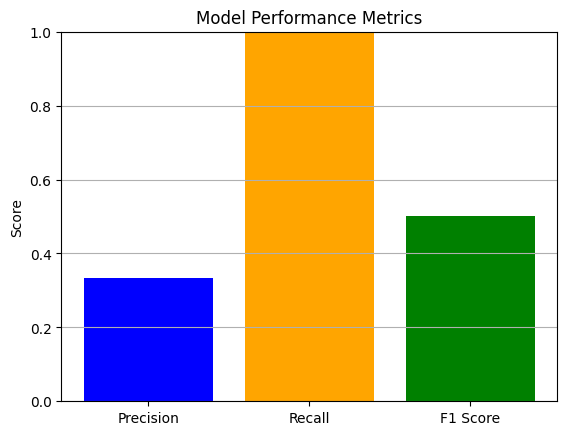

In [ ]:
metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision, recall, f1]

plt.bar(metrics, scores, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.grid(axis='y')
plt.show()

In models, precision generally improves due to lower false positives, whereas real users may experience lower precision due to lower relevance of recommendations, the system is good at retrieving all relevant recommendations, so the recall rate is relatively high, it is difficult to maintain high quality in terms of precision, resulting in many irrelevant recommendations. Users receive many irrelevant songs, and the system needs to improve precision to improve the overall user experience.

While some users like relevant recommendations, they often find that other recommendations do not match their tastes, resulting in inconsistent recommendations. Many users want more personalized recommendations and believe that incorporating their listening history can improve the relevance of recommendations.